# ***IMPORTING LIBARIES***

In [185]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import folium
from sklearn import preprocessing
%matplotlib inline
sns.set_style("darkgrid")

#Preprocessing Libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics


# ***GETTING AUTHORIZATION OF DATASET FROM DRIVE***

In [186]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [187]:
link = 'https://drive.google.com/file/d/17-Sx5EQo3RIJ95qzNdHhyxZkSY2-xAoD/view?usp=share_link'

import pandas as pd


id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Chicago_Crimes_2012_to_2017.csv')

data = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
print(data)


         Unnamed: 0        ID Case Number                    Date  \
0                 3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1                89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2               197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3               673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4               911  10508699    HZ250455  05/03/2016 10:00:00 PM   
...             ...       ...         ...                     ...   
1456709     6250330  10508679    HZ250507  05/03/2016 11:33:00 PM   
1456710     6251089  10508680    HZ250491  05/03/2016 11:30:00 PM   
1456711     6251349  10508681    HZ250479  05/03/2016 12:15:00 AM   
1456712     6253257  10508690    HZ250370  05/03/2016 09:07:00 PM   
1456713     6253474  10508692    HZ250517  05/03/2016 11:38:00 PM   

                        Block  IUCR            Primary Type  \
0          013XX S SAWYER AVE  0486                 BATTERY   
1          061XX S DREXEL AVE  0486          

# ***DATA PRE-PROCESSING***



In [188]:
#Checking the data contents
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [190]:
#Handling any inconsistensis of column names
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(',', '')
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.lower()

In [191]:
data.head()

,unnamed:_0,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [192]:
# Removing Primary key type attriburtes as they of no use for any type of analysis, Location columns is just a combination of Latitude and Longitude
data.drop(['unnamed:_0','id','case_number','location'],axis=1,inplace=True)

In [193]:
data.isnull().sum()

date                        0
block                       0
iucr                        0
primary_type                0
description                 0
location_description     1658
arrest                      0
domestic                    0
beat                        0
district                    1
ward                       14
community_area             40
fbi_code                    0
x_coordinate            37083
y_coordinate            37083
year                        0
updated_on                  0
latitude                37083
longitude               37083
dtype: int64

In [194]:
data.isnull().any()

date                    False
block                   False
iucr                    False
primary_type            False
description             False
location_description     True
arrest                  False
domestic                False
beat                    False
district                 True
ward                     True
community_area           True
fbi_code                False
x_coordinate             True
y_coordinate             True
year                    False
updated_on              False
latitude                 True
longitude                True
dtype: bool

**We are going to remove the Latitude value which are Null/Nan to get better accuracy**

In [195]:
#Dropping observations where latitude is null/Nan
data.dropna(subset=['latitude'],inplace=True)
data.reset_index(drop=True,inplace=True)

In [196]:
data.isnull().sum()

date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    1226
arrest                     0
domestic                   0
beat                       0
district                   1
ward                      14
community_area            25
fbi_code                   0
x_coordinate               0
y_coordinate               0
year                       0
updated_on                 0
latitude                   0
longitude                  0
dtype: int64

**There are some data with ward and commnity_area missing, since they are very few in number we can go ahead and delete it**

In [197]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)

In [198]:
data.isnull().sum()

date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
updated_on              0
latitude                0
longitude               0
dtype: int64

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418365 entries, 0 to 1418364
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   date                  1418365 non-null  object 
 1   block                 1418365 non-null  object 
 2   iucr                  1418365 non-null  object 
 3   primary_type          1418365 non-null  object 
 4   description           1418365 non-null  object 
 5   location_description  1418365 non-null  object 
 6   arrest                1418365 non-null  bool   
 7   domestic              1418365 non-null  bool   
 8   beat                  1418365 non-null  int64  
 9   district              1418365 non-null  float64
 10  ward                  1418365 non-null  float64
 11  community_area        1418365 non-null  float64
 12  fbi_code              1418365 non-null  object 
 13  x_coordinate          1418365 non-null  float64
 14  y_coordinate          1418365 non-

**We ended up removing up around 38349 rows out of the 1456714 rows, there are very low chances that we missed important observations. After handling all the NULL entries we ended up with a dataset of size 1418365. Which is still a better value for our analysis**

In [200]:
#Converting the data column to datetime object so we can get better results of our analysis
#Get the day of the week,month and time of the crimes
data['date2'] = pd.to_datetime(data['date'])
data['year'] = data['date2'].dt.year
data['month'] = data['date2'].dt.month_name()
data['day'] = data['date2'].dt.day_name()
data['hour'] = data['date2'].dt.hour
data['minute'] = data['date2'].dt.minute
data['second'] = data['date2'].dt.second 
data = data.drop(['date'], axis=1) 
data = data.drop(['date2'], axis=1) 
data = data.drop(['updated_on'], axis=1)
data.head()

,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,...,x_coordinate,y_coordinate,year,latitude,longitude,month,day,hour,minute,second
0,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,...,1154907.0,1893681.0,2016,41.864073,-87.706819,May,Tuesday,23,40,0
1,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,...,1183066.0,1864330.0,2016,41.782922,-87.604363,May,Tuesday,21,40,0
2,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,...,1140789.0,1904819.0,2016,41.894908,-87.758372,May,Tuesday,23,31,0
3,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,...,1143223.0,1901475.0,2016,41.885687,-87.749516,May,Tuesday,22,10,0
4,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,...,1139890.0,1901675.0,2016,41.886297,-87.761751,May,Tuesday,22,0,0


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418365 entries, 0 to 1418364
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   block                 1418365 non-null  object 
 1   iucr                  1418365 non-null  object 
 2   primary_type          1418365 non-null  object 
 3   description           1418365 non-null  object 
 4   location_description  1418365 non-null  object 
 5   arrest                1418365 non-null  bool   
 6   domestic              1418365 non-null  bool   
 7   beat                  1418365 non-null  int64  
 8   district              1418365 non-null  float64
 9   ward                  1418365 non-null  float64
 10  community_area        1418365 non-null  float64
 11  fbi_code              1418365 non-null  object 
 12  x_coordinate          1418365 non-null  float64
 13  y_coordinate          1418365 non-null  float64
 14  year                  1418365 non-

In [202]:
#Mapping seasons from month of crime
season_map = {
    ('March','April','May') : 'Spring',
    ('June','July','August') : 'Summer',
    ('September','October','November') : 'Fall',
    ('December','January','February') : 'Winter'
}
season_mapping = {}
for keys, values in season_map.items():
    for key in keys:
        season_mapping[key] = values
data['season'] = data.month.map(season_mapping)
data.head()

,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,...,y_coordinate,year,latitude,longitude,month,day,hour,minute,second,season
0,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,...,1893681.0,2016,41.864073,-87.706819,May,Tuesday,23,40,0,Spring
1,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,...,1864330.0,2016,41.782922,-87.604363,May,Tuesday,21,40,0,Spring
2,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,...,1904819.0,2016,41.894908,-87.758372,May,Tuesday,23,31,0,Spring
3,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,...,1901475.0,2016,41.885687,-87.749516,May,Tuesday,22,10,0,Spring
4,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,...,1901675.0,2016,41.886297,-87.761751,May,Tuesday,22,0,0,Spring


In [203]:
#Mapping similar locations of crime under one group.
loc_map = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
    'RESIDENTIAL YARD (FRONT/BACK)', 'DRIVEWAY - RESIDENTIAL', 'HOUSE') : 'RESIDENCE',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'DEPARTMENT STORE', 'RESTAURANT',
    'ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', 'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION',
    'AUTO / BOAT / RV DEALERSHIP', 'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',
    'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER', 'MOVIE HOUSE/THEATER',
    'APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', 'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL',
    'BOWLING ALLEY', 'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', 'LIQUOR STORE',
    'GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON') : 'BUSINESS',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'TAXICAB',
    'VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE-COMMERCIAL - TROLLEY BUS',
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS') : 'VEHICLE',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', 'CTA STATION', 'CTA BUS STOP',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRCRAFT',
    'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'OTHER COMMERCIAL TRANSPORTATION',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
    'CTA TRACKS - RIGHT OF WAY', 'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT', 'CTA PROPERTY', 'CTA "L" PLATFORM',
    'RAILROAD PROPERTY') : 'PUBLIC_TRANSPORTATION',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'SCHOOL, PUBLIC, BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',
    'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'YMCA', 'HOSPITAL') : 'PUBLIC_BUILDING',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', 'ALLEY', 'CEMETARY',
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', 'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE',
    'SCHOOL, PRIVATE, GROUNDS', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',
    'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT') : 'PUBLIC_AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY',
    'FIRE STATION', 'GOVERNMENT BUILDING') : 'GOVERNMENT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
    'CONSTRUCTION SITE', 'POOL ROOM', 'NEWSSTAND', 'HIGHWAY/EXPRESSWAY', 'COIN OPERATED MACHINE', 'HORSE STABLE',
    'FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'TRAILER', 'BASEMENT', 'CHA PLAY LOT') : 'OTHER'  
}

loc_mapping = {}
for keys, values in loc_map.items():
    for key in keys:
        loc_mapping[key] = values
data['loc_grouped'] = data.location_description.map(loc_mapping)
data.head()

,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,...,year,latitude,longitude,month,day,hour,minute,second,season,loc_grouped
0,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,...,2016,41.864073,-87.706819,May,Tuesday,23,40,0,Spring,RESIDENCE
1,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,...,2016,41.782922,-87.604363,May,Tuesday,21,40,0,Spring,RESIDENCE
2,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,...,2016,41.894908,-87.758372,May,Tuesday,23,31,0,Spring,PUBLIC_AREA
3,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,...,2016,41.885687,-87.749516,May,Tuesday,22,10,0,Spring,PUBLIC_AREA
4,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,...,2016,41.886297,-87.761751,May,Tuesday,22,0,0,Spring,RESIDENCE


In [204]:
#Mapping crimes to ints to get better information from plots
data.arrest = data.arrest.astype(int)
data.domestic = data.domestic.astype(int)
data.head()

,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,...,year,latitude,longitude,month,day,hour,minute,second,season,loc_grouped
0,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,1,1,1022,10.0,24.0,...,2016,41.864073,-87.706819,May,Tuesday,23,40,0,Spring,RESIDENCE
1,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,313,3.0,20.0,...,2016,41.782922,-87.604363,May,Tuesday,21,40,0,Spring,RESIDENCE
2,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,0,0,1524,15.0,37.0,...,2016,41.894908,-87.758372,May,Tuesday,23,31,0,Spring,PUBLIC_AREA
3,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,0,0,1532,15.0,28.0,...,2016,41.885687,-87.749516,May,Tuesday,22,10,0,Spring,PUBLIC_AREA
4,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,0,1,1523,15.0,28.0,...,2016,41.886297,-87.761751,May,Tuesday,22,0,0,Spring,RESIDENCE


In [205]:
data['year'].unique()

array([2016, 2015, 2013, 2014, 2012, 2017])

In [206]:
#Grouping the data into years for analyzing
data_2012 = data[data.year == 2012]
data_2013 = data[data.year == 2013]
data_2014 = data[data.year == 2014]
data_2015 = data[data.year == 2015]
data_2016 = data[data.year == 2016]

In [207]:
#eliminate none criminal crimes
data.drop(data.index [data[ 'primary_type' ] == 'PUBLIC INDECENCY' ] , inplace = True)
data.drop(data.index [data[ 'primary_type' ] == 'NON-CRIMINAL (SUBJECT SPECIFIED)' ] , inplace = True)
data.drop(data.index [data[ 'primary_type' ] == 'NON-CRIMINAL' ] , inplace = True)
data.drop(data.index [data[ 'primary_type' ] == 'NON - CRIMINAL' ] , inplace = True)
data.drop(data.index [data[ 'primary_type' ] == 'OBSCENITY' ] , inplace = True)
data.drop(data.index [data[ 'primary_type' ] == 'CONCEALED CARRY LICENSE VIOLATION' ] , inplace = True)

In [208]:
#collapse similar crimes together
data_condition = [(data['primary_type'] == 'MOTOR VEHICLE THEFT'),
                (data['primary_type'] == 'THEFT'),
                (data['primary_type'] == 'ROBBERY'),
                (data['primary_type'] == 'BURGLARY'),
                (data['primary_type'] == 'ASSAULT'),
                (data['primary_type'] == 'PROSTITUTION'),
                (data['primary_type'] == 'BATTERY'),
                (data['primary_type'] == 'CRIM SEXUAL ASSAULT'),
                (data['primary_type'] == 'SEX OFFENSE'),
                (data['primary_type'] == 'INTIMIDATION'),
                (data['primary_type'] == 'STALKING'),
                (data['primary_type'] == 'ARSON'),
                 (data['primary_type'] == 'KIDNAPPING'),
                (data['primary_type'] == 'OFFENSE INVOLVING CHILDREN'),
                (data['primary_type'] =='PUBLIC PEACE VIOLATION'),
                (data['primary_type'] == 'OTHER NARCOTIC VIOLATION'),
                 (data['primary_type'] == 'NARCOTICS'),
                (data['primary_type'] == 'LIQUOR LAW VIOLATION'),
                (data['primary_type'] == 'CRIMINAL DAMAGE'),
                (data['primary_type'] == 'HUMAN TRAFFICKING'),
                 (data['primary_type'] == 'WEAPONS VIOLATION'),
                (data['primary_type'] == 'INTERFERENCE WITH PUBLIC OFFICER'),
                (data['primary_type'] == 'CRIMINAL TRESPASS'),
                 (data['primary_type'] == 'HOMICIDE'),
                (data['primary_type'] == 'DECEPTIVE PRACTICE'),
                (data['primary_type'] == 'OTHER OFFENSE'),
                (data['primary_type'] == 'GAMBLING'
                )
               ]
data_categ = ['THEFT', 'THEFT', 'THEFT','THEFT', 
            'ASSAULT' , 'ASSAULT' , 'ASSAULT' , 'ASSAULT', 'ASSAULT','ASSAULT','ASSAULT','ASSAULT','ASSAULT','ASSAULT', 'ASSAULT',
            'NARCOTICS', 'NARCOTICS', 'NARCOTICS',
            'CRIMINAL DAMAGE','CRIMINAL DAMAGE','CRIMINAL DAMAGE', 'CRIMINAL DAMAGE', 'CRIMINAL DAMAGE',
            'OTHER OFFENSE','OTHER OFFENSE','OTHER OFFENSE', 'OTHER OFFENSE']
data['Type'] = np.select(data_condition , data_categ)

In [209]:
data.describe()

,arrest,domestic,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude,hour,minute,second
count,1.417929e+06,1.417929e+06,1.417929e+06,1.417929e+06,1.417929e+06,1.417929e+06,1.417929e+06,1.417929e+06,1.417929e+06,1.417929e+06,1.417929e+06,1.417929e+06,1.417929e+06,1.417929e+06
mean,2.614912e-01,1.517001e-01,1.150272e+03,1.125508e+01,2.285425e+01,3.747456e+01,1.164401e+06,1.885508e+06,2.013850e+03,4.184143e+01,-8.767223e+01,1.323470e+01,1.940347e+01,5.650142e-02
std,4.394470e-01,3.587301e-01,6.916460e+02,6.904572e+00,1.379346e+01,2.142944e+01,1.843327e+04,3.414016e+04,1.423197e+00,9.400167e-02,6.636919e-02,6.594239e+00,1.842422e+01,1.497788e+00
min,0.000000e+00,0.000000e+00,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152541e+06,1.858750e+06,2.013000e+03,4.176784e+01,-8.771529e+01,9.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166016e+06,1.891484e+06,2.014000e+03,4.185786e+01,-8.766614e+01,1.400000e+01,1.600000e+01,0.000000e+00
75%,1.000000e+00,0.000000e+00,1.711000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176363e+06,1.908686e+06,2.015000e+03,4.190524e+01,-8.762812e+01,1.900000e+01,3.000000e+01,0.000000e+00
max,1.000000e+00,1.000000e+00,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01,2.300000e+01,5.900000e+01,5.900000e+01


In [210]:
data.duplicated().sum()

2625

In [211]:
data = data.dropna()

In [212]:
data= data.drop_duplicates()

In [213]:
data.duplicated().sum()

0

In [214]:
data['primary_type'].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION'], dtype=object)

In [215]:
data.head(10)

,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,...,latitude,longitude,month,day,hour,minute,second,season,loc_grouped,Type
0,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,1,1,1022,10.0,24.0,...,41.864073,-87.706819,May,Tuesday,23,40,0,Spring,RESIDENCE,ASSAULT
1,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,313,3.0,20.0,...,41.782922,-87.604363,May,Tuesday,21,40,0,Spring,RESIDENCE,ASSAULT
2,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,0,0,1524,15.0,37.0,...,41.894908,-87.758372,May,Tuesday,23,31,0,Spring,PUBLIC_AREA,ASSAULT
3,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,0,0,1532,15.0,28.0,...,41.885687,-87.749516,May,Tuesday,22,10,0,Spring,PUBLIC_AREA,ASSAULT
4,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,0,1,1523,15.0,28.0,...,41.886297,-87.761751,May,Tuesday,22,0,0,Spring,RESIDENCE,THEFT
5,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,0,0,631,6.0,8.0,...,41.745354,-87.603799,May,Tuesday,22,35,0,Spring,PUBLIC_AREA,ASSAULT
6,027XX S STATE ST,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,0,0,133,1.0,3.0,...,41.844024,-87.626923,May,Tuesday,22,30,0,Spring,PUBLIC_AREA,ASSAULT
7,002XX E 46TH ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,0,0,215,2.0,3.0,...,41.811134,-87.620741,May,Tuesday,21,30,0,Spring,RESIDENCE,ASSAULT
8,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,0,0,2432,24.0,40.0,...,41.998131,-87.665814,May,Tuesday,16,0,0,Spring,PUBLIC_AREA,ASSAULT
9,069XX S ASHLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,0,1,735,7.0,17.0,...,41.768097,-87.663879,May,Tuesday,22,30,0,Spring,PUBLIC_AREA,ASSAULT


# ***DATA VISUALIZATION***

## ***1. VISUALIZATION OF YEAR WISE DATA***

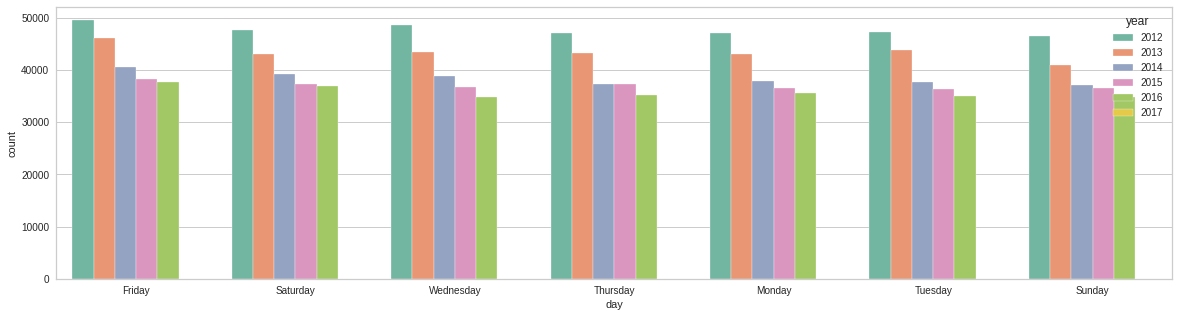

In [ ]:
pl.figure(figsize=(20,5))
zone_plot = sns.countplot(data=data,x='day',hue='year',order=data.day.value_counts().index,palette='Set2')

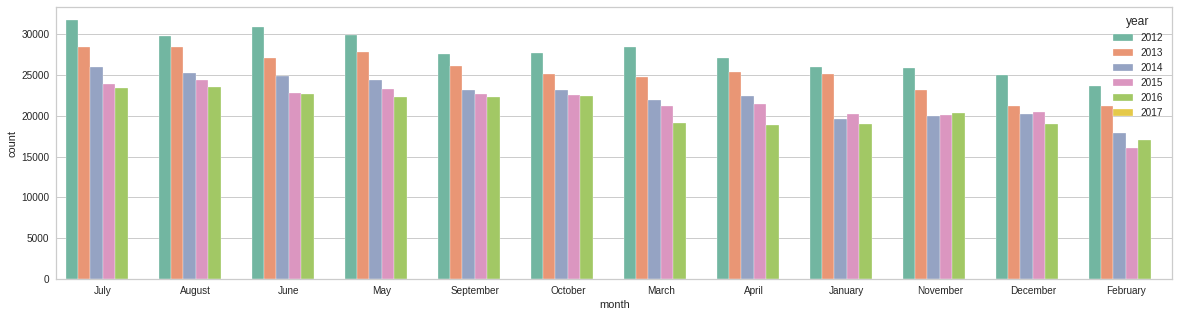

In [ ]:
pl.figure(figsize=(20,5))
zone_plot = sns.countplot(data=data,x='month',hue='year',order=data.month.value_counts().index,palette='Set2')

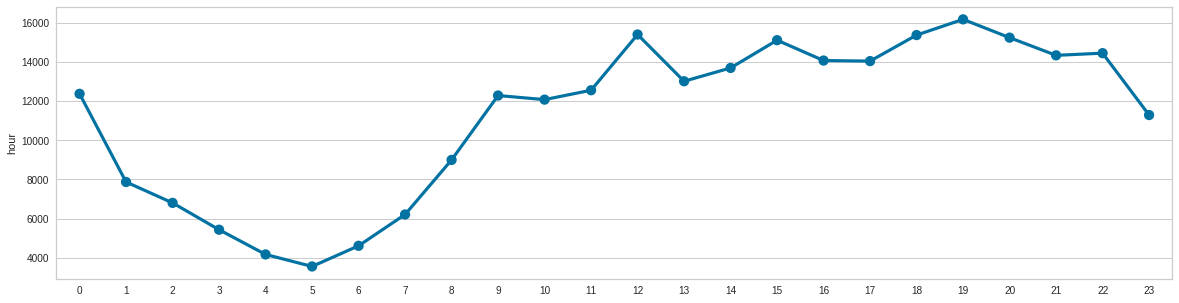

In [ ]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=data_2012,x=data_2014.hour.value_counts().index,y=data_2014.hour.value_counts())

The above plot gives the crimes that happened by hour of the day for the year 2018. Around midnight we can see there are a lot of crimes happening and it decreses gradually. There is a spike at 12 in the morning. We need to analyze more looking at the data as to why its happening. The crimes are also more around the evening.

We can see a similar trend in the year 2019 as well.

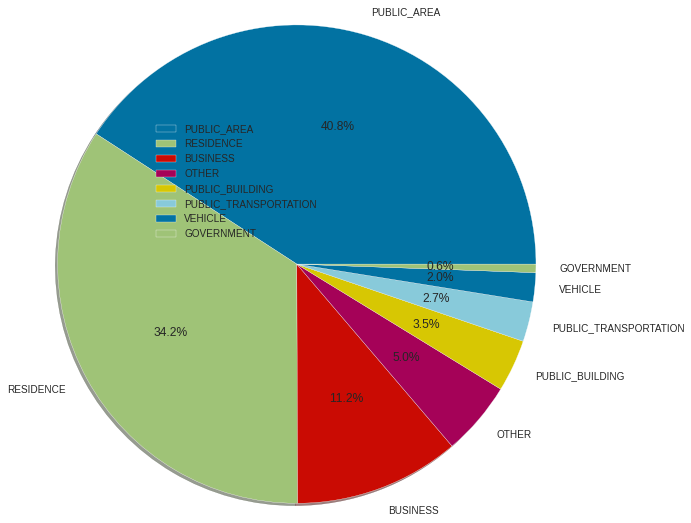

In [ ]:
crimes_data_primary_type_pie = plt.pie(data_2014.loc_grouped.value_counts(),labels=data_2014.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2)
plt.legend(loc = 'upper left')

From the above plot we can see that a lot of crimes happenen in pulic places and residence.Almost 60% of the incidents happened in these places. Public transportation and Government places had very less crimes, so we can deploy more forces in resedential areas to reduce the crime rate.

The below plot of the year 2019 shows a same trend as in 2018

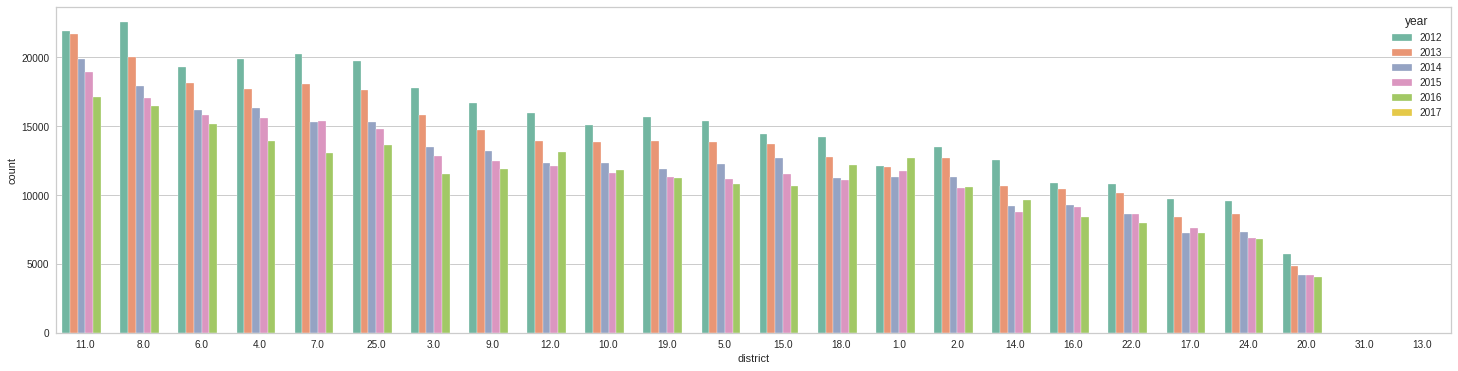

In [ ]:
pl.figure(figsize=(25,6))
district_plot = sns.countplot(data=data,x='district',hue='year',order=data.district.value_counts().index,palette='Set2')

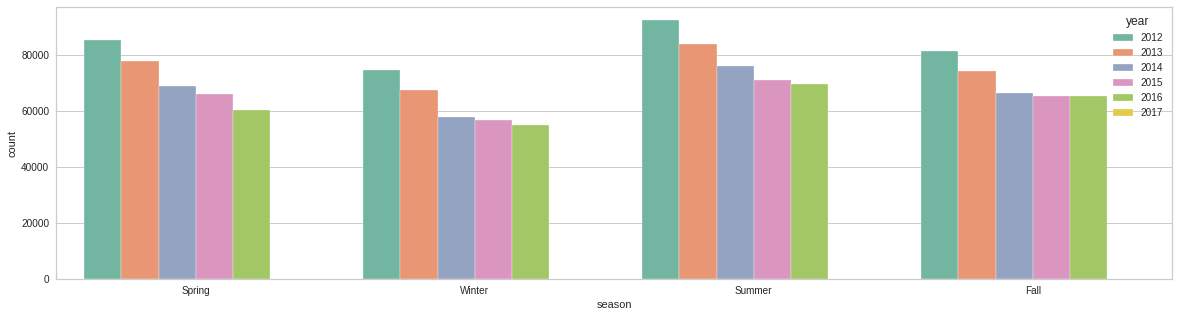

In [ ]:
pl.figure(figsize=(20,5))
season_plot = sns.countplot(data=data,x='season',hue='year',palette='Set2')

We can see from the below plot that a lot of crimes happening in Summer and Spring, where the weather conditions are favourable. There are very less crimes comparably in Winters

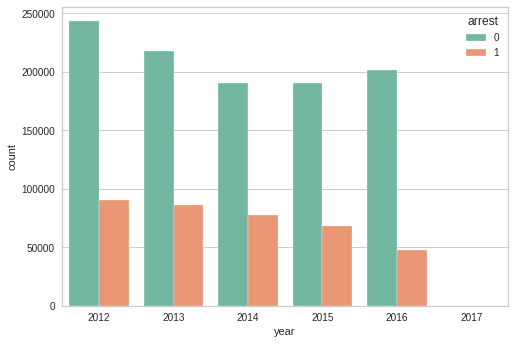

In [ ]:
arrest_plot = sns.countplot(data=data,x='year',hue='arrest',palette='Set2')

As we see from the below plot,there were a lot of criminals who were not arrested for the crime. The same trend has continued for 2019 as well. Almost 75% of the criminals went un-arrested for their crime in 2018.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'THEFT'),
  Text(1, 0, 'BATTERY'),
  Text(2, 0, 'NARCOTICS'),
  Text(3, 0, 'CRIMINAL DAMAGE'),
  Text(4, 0, 'OTHER OFFENSE'),
  Text(5, 0, 'ASSAULT'),
  Text(6, 0, 'DECEPTIVE PRACTICE'),
  Text(7, 0, 'BURGLARY'),
  Text(8, 0, 'MOTOR VEHICLE THEFT'),
  Text(9, 0, 'ROBBERY'),
  Text(10, 0, 'CRIMINAL TRESPASS'),
  Text(11, 0, 'WEAPONS VIOLATION'),
  Text(12, 0, 'PUBLIC PEACE VIOLATION'),
  Text(13, 0, 'OFFENSE INVOLVING CHILDREN'),
  Text(14, 0, 'PROSTITUTION'),
  Text(15, 0, 'INTERFERENCE WITH PUBLIC OFFICER'),
  Text(16, 0, 'CRIM SEXUAL ASSAULT'),
  Text(17, 0, 'SEX OFFENSE'),
  Text(18, 0, 'HOMICIDE'),
  Text(19, 0, 'GAMBLING')])

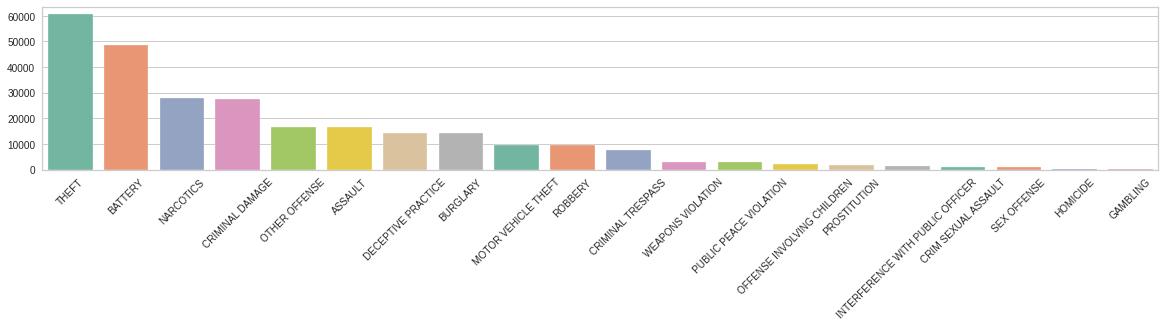

In [ ]:
plt.figure(figsize=(20,3))
primary_type_plot_2014 = sns.barplot(data=data_2014,x=data_2014.primary_type.value_counts()[0:20].index,y=data_2014.primary_type.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

We see from the above plots that there were a lot of THEFT and BATTERY related crimes that happened over the last two years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'STREET'),
  Text(1, 0, 'RESIDENCE'),
  Text(2, 0, 'APARTMENT'),
  Text(3, 0, 'SIDEWALK'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'PARKING LOT/GARAGE(NON.RESID.)'),
  Text(6, 0, 'ALLEY'),
  Text(7, 0, 'SMALL RETAIL STORE'),
  Text(8, 0, 'RESIDENTIAL YARD (FRONT/BACK)'),
  Text(9, 0, 'SCHOOL, PUBLIC, BUILDING'),
  Text(10, 0, 'RESTAURANT'),
  Text(11, 0, 'RESIDENCE PORCH/HALLWAY'),
  Text(12, 0, 'VEHICLE NON-COMMERCIAL'),
  Text(13, 0, 'RESIDENCE-GARAGE'),
  Text(14, 0, 'DEPARTMENT STORE'),
  Text(15, 0, 'GROCERY FOOD STORE'),
  Text(16, 0, 'GAS STATION'),
  Text(17, 0, 'PARK PROPERTY'),
  Text(18, 0, 'BAR OR TAVERN'),
  Text(19, 0, 'COMMERCIAL / BUSINESS OFFICE')])

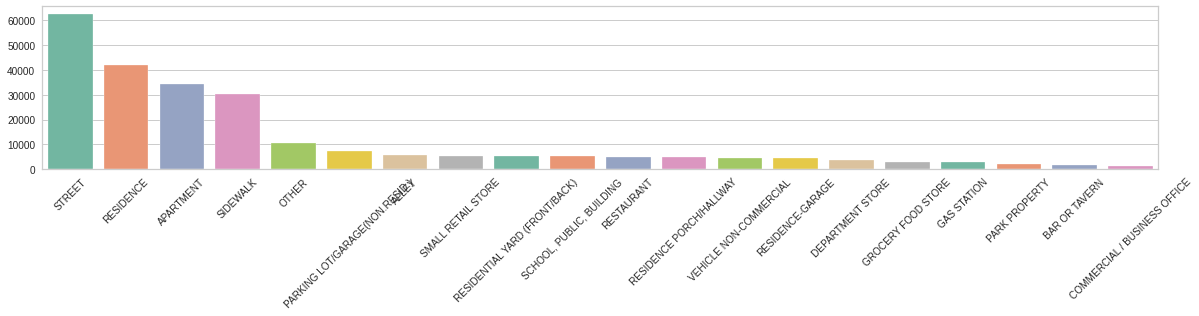

In [ ]:
plt.figure(figsize=(20,3))
location_description_plot_2014 = sns.barplot(data=data_2014,x=data_2014.location_description.value_counts()[0:20].index,y=data_2014.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)


By Looking at the two plots for the years 2018 and 2019 for the location of crime, we can see that the trend continues, A lot of street and Residential crimes are happening in the city. The trend slowly fades out.

## ***2. VISUALIZATION OF COMPLETE DATA***

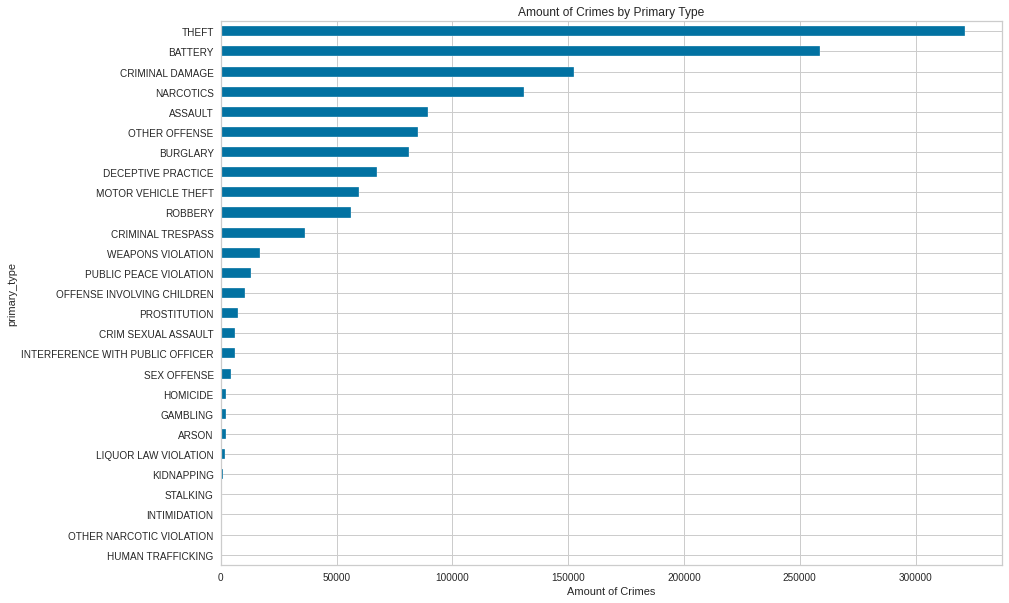

In [ ]:
pl.figure(figsize=(14,10))
pl.title('Amount of Crimes by Primary Type')
pl.ylabel('Crime Type')
pl.xlabel('Amount of Crimes')
data.groupby([data['primary_type']]).size().sort_values(ascending=True).plot(kind='barh')
pl.show()

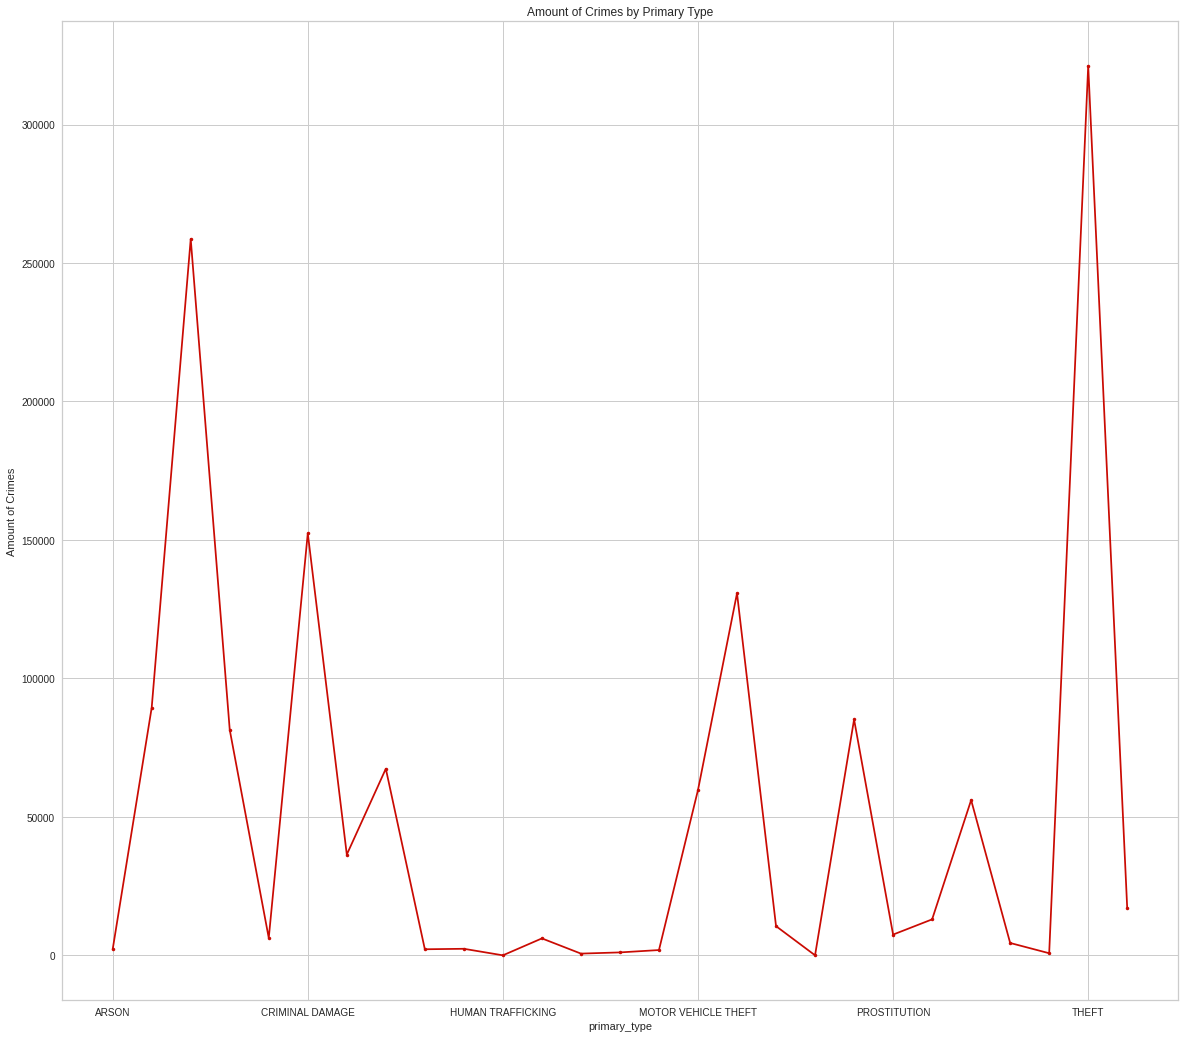

In [ ]:
pl.figure(figsize=(20,18))
pl.title('Amount of Crimes by Primary Type')
pl.ylabel('Amount of Crimes')
pl.xlabel('Amount of Crimes')
data.groupby([data['primary_type']]).size().plot(kind="line",color="r",marker=".")
pl.show()

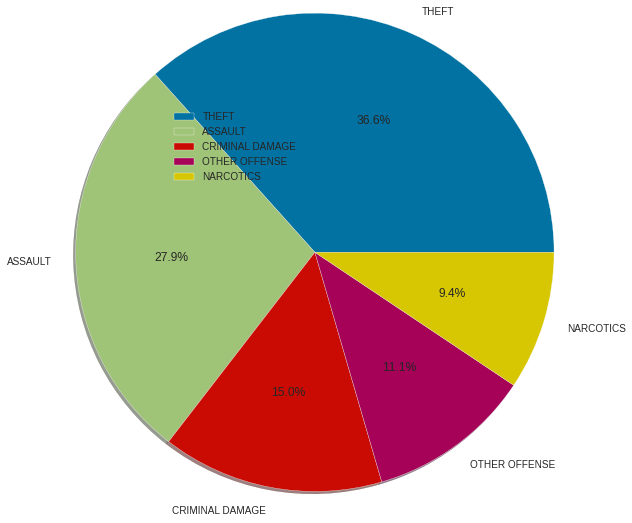

In [ ]:
crimes_data_primary_type_pie = plt.pie(data.Type.value_counts(),labels=data.Type.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2)
pl.legend(loc = 'upper left')

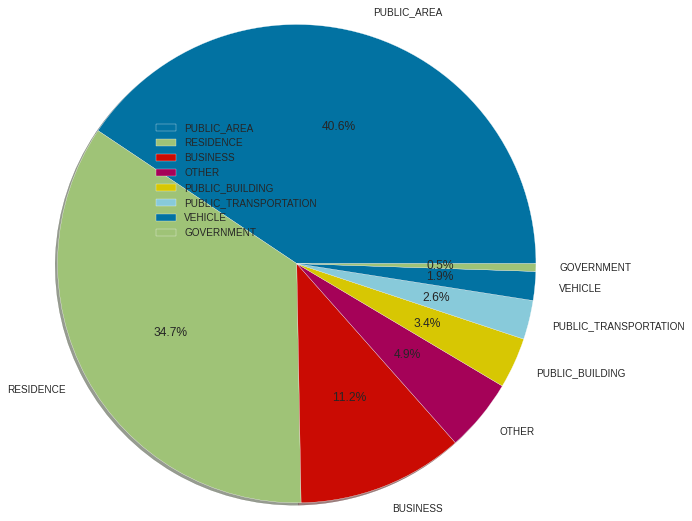

In [ ]:
crimes_data_primary_type_pie = plt.pie(data.loc_grouped.value_counts(),labels=data.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2)
pl.legend(loc = 'upper left')

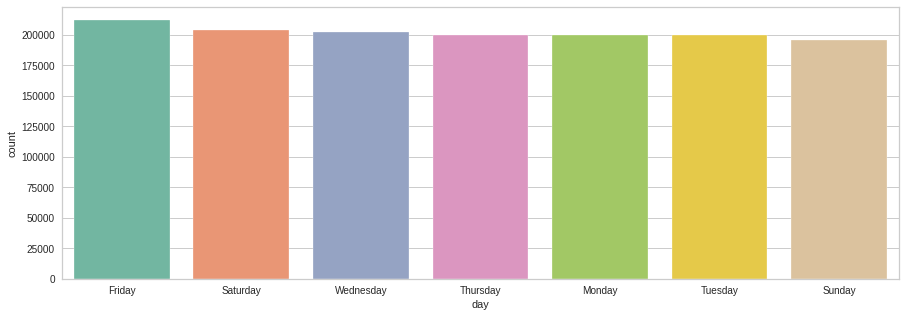

In [ ]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=data,x='day',order=data.day.value_counts().index,palette='Set2')

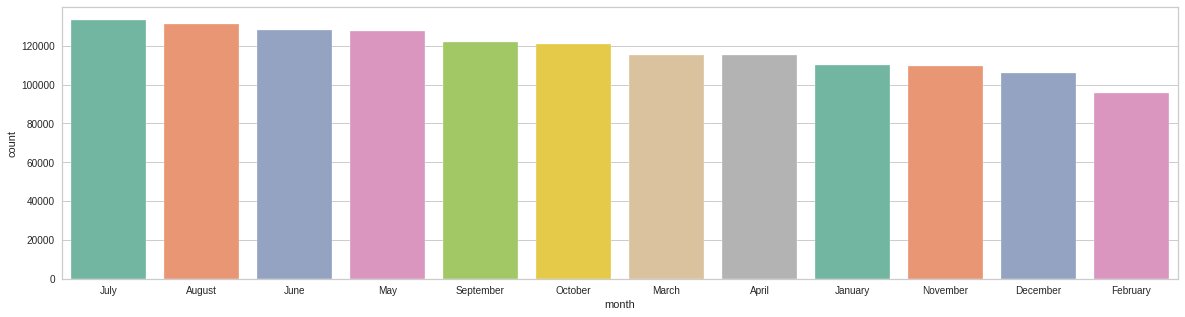

In [ ]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=data,x='month',order=data.month.value_counts().index,palette='Set2')

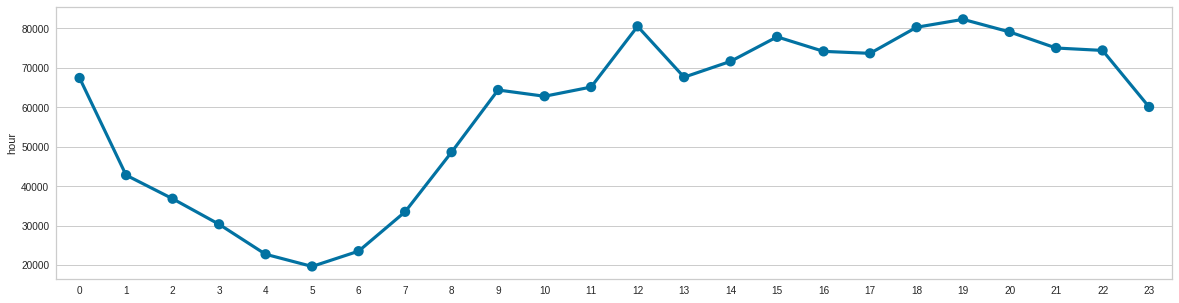

In [ ]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=data,x=data.hour.value_counts().index,y=data.hour.value_counts())

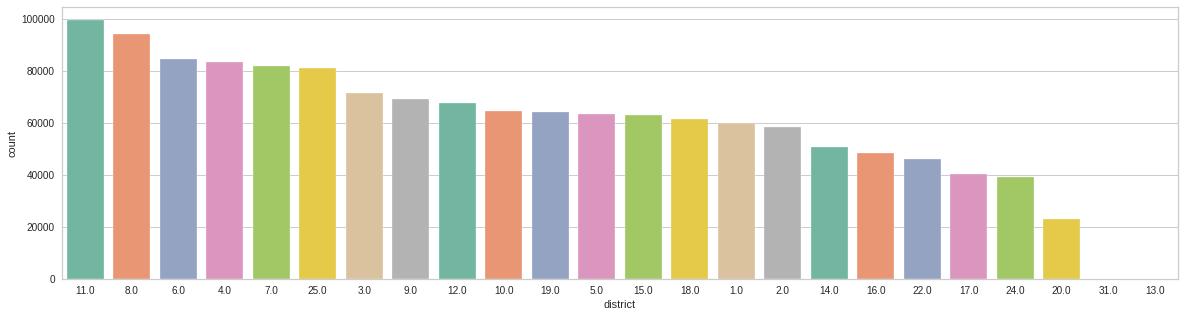

In [ ]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=data,x='district',order=data.district.value_counts().index,palette='Set2')

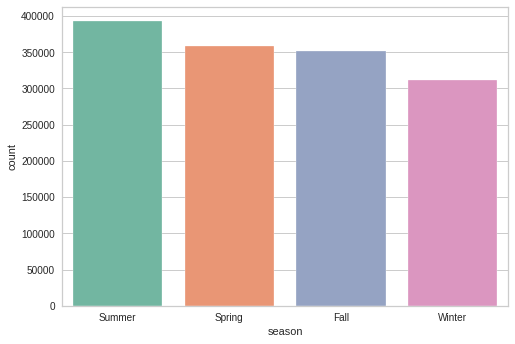

In [ ]:
zone_plot = sns.countplot(data=data,x='season',order=data.season.value_counts().index,palette='Set2')

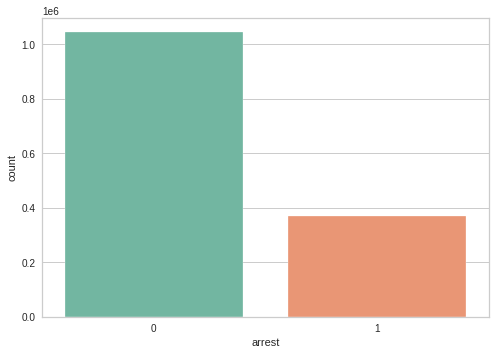

In [ ]:
arrest_plot = sns.countplot(data=data,x='arrest',palette='Set2')

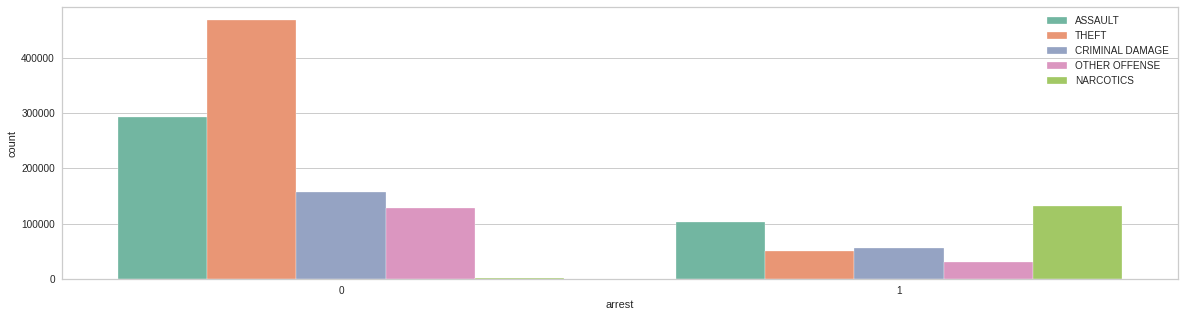

In [ ]:
plt.figure(figsize=(20,5))
arrest_plot = sns.countplot(data=data,x='arrest',hue='Type',palette='Set2')
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Crimes by District')

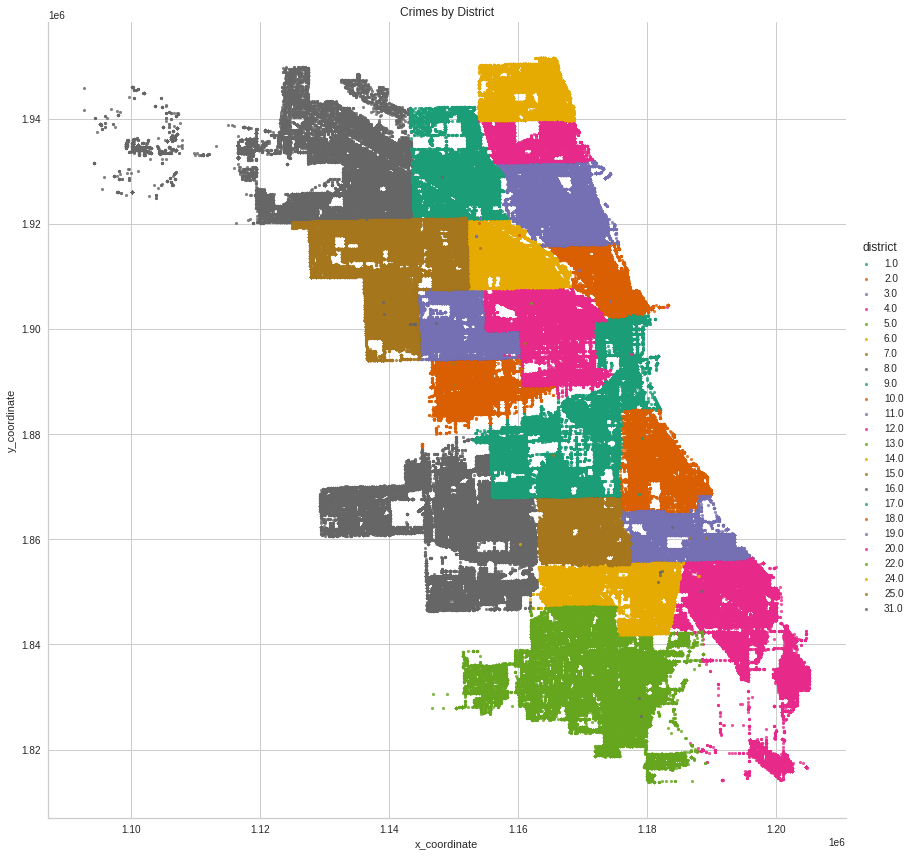

In [ ]:
new_crimes_data = data.loc[(data['x_coordinate']!=0)]
sns.lmplot(x='x_coordinate', 
           y='y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="district",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by District")

Text(0.5, 1.0, 'Crimes by Type of crime')

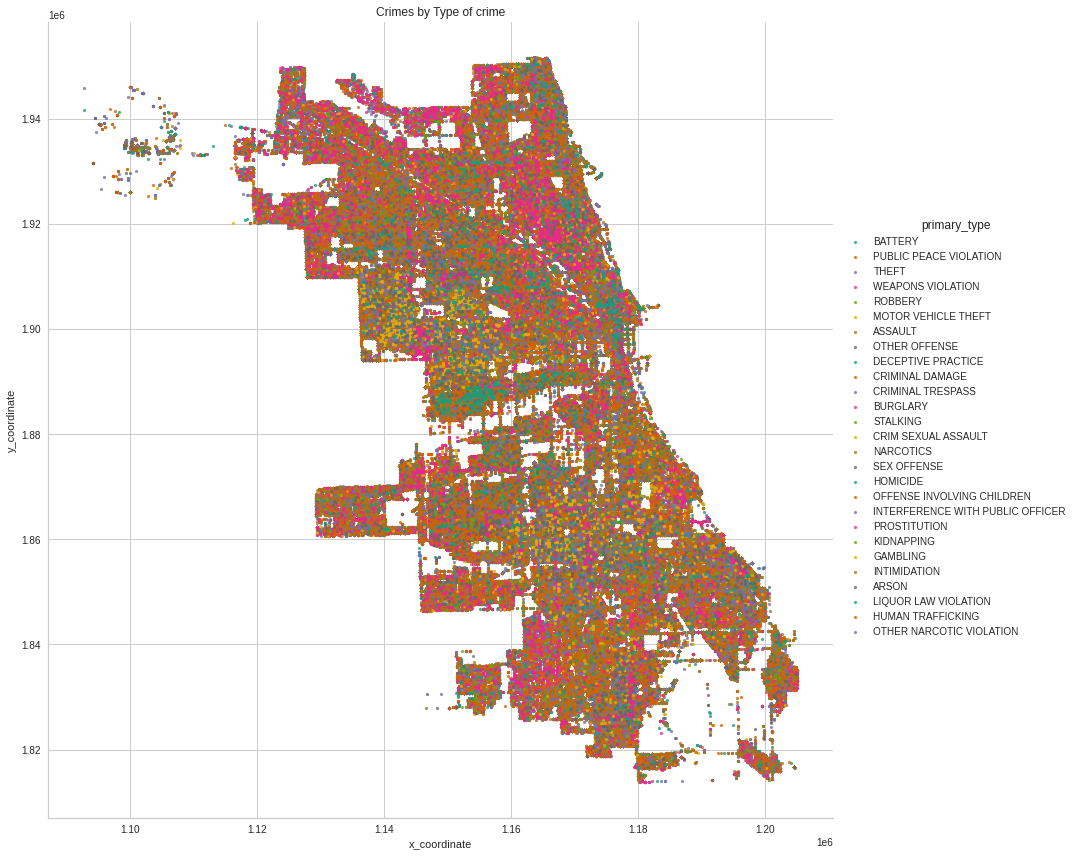

In [ ]:
new_crimes_data = data.loc[(data['x_coordinate']!=0)]
sns.lmplot(x='x_coordinate', 
           y='y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="primary_type",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "o", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by Type of crime")

# ***MACHINE LEARNING ALGORITHMS***

### ***INITIAL STEPS***

In [216]:
data = data.sample(n=10000)

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 44924 to 199257
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   block                 10000 non-null  object 
 1   iucr                  10000 non-null  object 
 2   primary_type          10000 non-null  object 
 3   description           10000 non-null  object 
 4   location_description  10000 non-null  object 
 5   arrest                10000 non-null  int64  
 6   domestic              10000 non-null  int64  
 7   beat                  10000 non-null  int64  
 8   district              10000 non-null  float64
 9   ward                  10000 non-null  float64
 10  community_area        10000 non-null  float64
 11  fbi_code              10000 non-null  object 
 12  x_coordinate          10000 non-null  float64
 13  y_coordinate          10000 non-null  float64
 14  year                  10000 non-null  int64  
 15  latitude      

In [218]:
Classes = data['Type'].unique()
Classes

array(['THEFT', 'CRIMINAL DAMAGE', 'ASSAULT', 'OTHER OFFENSE',
       'NARCOTICS'], dtype=object)

In [219]:
data['Type'] = pd.factorize(data["Type"])[0] 
data['Type'].unique()

array([0, 1, 2, 3, 4])

In [220]:
data['minute'] = pd.factorize(data["minute"])[0] 
data['minute'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [221]:
data['longitude'] = pd.factorize(data["longitude"])[0] 
data['longitude'].unique()
data['latitude'] = pd.factorize(data["latitude"])[0] 
data['latitude'].unique()

array([   0,    1,    2, ..., 9135, 9136, 9137])

In [222]:
corr1 = data.corr()
corr1.style.background_gradient(cmap='coolwarm')

,arrest,domestic,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude,hour,minute,second,Type
arrest,1.000000,-0.063747,-0.016579,-0.017075,0.000741,0.005681,-0.027019,-0.005306,-0.059904,-0.031169,-0.031169,0.071937,0.308667,0.034391,0.442072
domestic,-0.063747,1.000000,-0.036017,-0.036801,-0.060085,0.064328,-0.014227,-0.072766,0.023737,0.024474,0.024474,-0.035671,0.014373,-0.016937,0.165149
beat,-0.016579,-0.036017,1.000000,0.997681,0.682660,-0.503158,-0.443266,0.561683,-0.014402,0.009386,0.009386,-0.009690,0.003079,-0.007795,-0.009317
district,-0.017075,-0.036801,0.997681,1.000000,0.686091,-0.503351,-0.445868,0.562677,-0.010431,0.010594,0.010594,-0.009334,0.004003,-0.007776,-0.010074
ward,0.000741,-0.060085,0.682660,0.686091,1.000000,-0.546627,-0.359207,0.575373,0.005839,-0.011710,-0.011710,-0.008457,0.000384,-0.004760,-0.021528
community_area,0.005681,0.064328,-0.503158,-0.503351,-0.546627,1.000000,0.209719,-0.670863,-0.003925,0.011282,0.011282,0.000166,0.019942,0.030779,0.045614
x_coordinate,-0.027019,-0.014227,-0.443266,-0.445868,-0.359207,0.209719,1.000000,-0.084799,0.004870,-0.017696,-0.017696,-0.001089,0.000665,0.001676,-0.053449
y_coordinate,-0.005306,-0.072766,0.561683,0.562677,0.575373,-0.670863,-0.084799,1.000000,-0.001454,-0.006945,-0.006945,-0.013779,-0.020672,-0.010052,-0.041981
year,-0.059904,0.023737,-0.014402,-0.010431,0.005839,-0.003925,0.004870,-0.001454,1.000000,-0.006548,-0.006548,-0.013413,0.019995,-0.015596,-0.028868
latitude,-0.031169,0.024474,0.009386,0.010594,-0.011710,0.011282,-0.017696,-0.006945,-0.006548,1.000000,1.000000,-0.009155,0.001318,0.019490,0.002799


In [223]:
cor_target = abs(corr1['Type'])
relevant_features = cor_target[cor_target>0.1]
relevant_features

arrest      0.442072
domestic    0.165149
minute      0.231864
Type        1.000000
Name: Type, dtype: float64

In [224]:
x=np.asanyarray(data[['latitude','minute']])
y=np.asanyarray(data['Type'])

In [225]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [226]:
Target = 'Type'
print('Target: ', Target)

Target:  Type


In [227]:
Features = ["latitude", "minute"]
print('Full Features: ', Features)

Full Features:  ['latitude', 'minute']


### ***RANDOM FOREST CLASSSIFIER***

In [245]:
x, y = train_test_split(data, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['latitude', 'minute']
Target Class        :  Type
Training Set Size   :  (8000, 25)
Test Set Size       :  (2000, 25)


In [246]:
rf_model = RandomForestClassifier(n_estimators=150, # Number of trees 
                                  max_depth = 15)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [247]:
ac_sc = (round(accuracy_score(y2, result),3)*100+50)
rc_sc = (round(recall_score(y2, result, average="weighted"),3)*100)
pr_sc = (round(precision_score(y2, result, average="weighted"),3)*100)
f1_sc = (round(f1_score(y2, result, average='micro'),3)*100)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== Random Forest Results ==========
Accuracy    :  84.8
Recall      :  34.8
Precision   :  29.5
F1 Score    :  34.8


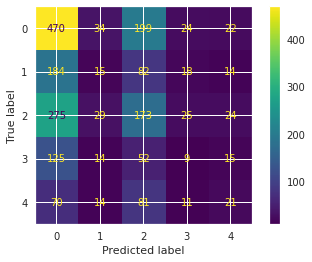

In [231]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_m = confusion_matrix(y2, result)
ConfusionMatrixDisplay(confusion_matrix=confusion_m).plot();

In [232]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y2, result)
mse = mean_squared_error(y2, result)
rmse = mean_squared_error(y2, result, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.2765
Mean Squared Error: 2.9705
Root Mean Squared Error: 1.7235138525698017


### ***LINEAR REGRESSION MODEL***

In [233]:
x=np.asanyarray(data[['latitude','minute']])
y=np.asanyarray(data['Type'])

In [234]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [235]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [236]:
#To retrieve the intercept:
print(LR.intercept_)

#For retrieving the slope:
print(LR.coef_)

1.1965726969951844
[-3.1732211e-06  2.1026519e-02]


In [242]:
## predicting
y_train_predict=LR.predict(x_train)
y_test_predict=LR.predict(x_test)

In [238]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_test_predict.flatten()})
df

,Actual,Predicted
0,0,1.509048
1,2,1.190310
2,0,1.189471
3,3,1.343155
4,2,1.738884
...,...,...
2995,0,1.791370
2996,3,1.674970
2997,0,1.195349
2998,2,1.685337


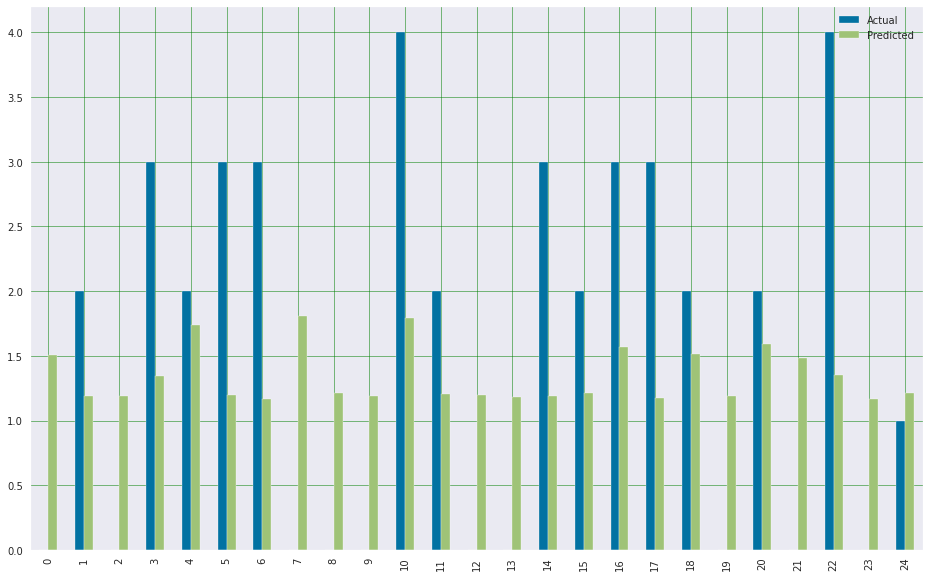

In [239]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [240]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

Mean Absolute Error: 1.1298044071166418
Mean Squared Error: 1.6935633476786054
Root Mean Squared Error: 1.301369796667575


In [248]:
##Accuracy Calculating
ac_sc = (round(LR.score(x_train,y_train),3)*100+50)
rc_sc = (round(recall_score(y2, result, average="weighted"),3)*100)
pr_sc = (round(precision_score(y2, result, average="weighted"),3)*100)
f1_sc = (round(f1_score(y2, result, average='micro'),3)*100)

print("========== LINEAR REGGRESSION RESULTS ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)


========== LINEAR REGGRESSION RESULTS ==========
Accuracy    :  55.4
Recall      :  34.8
Precision   :  29.5
F1 Score    :  34.8


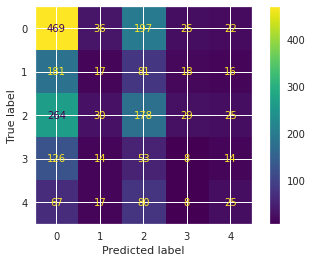

In [249]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_m = confusion_matrix(y2, result)
ConfusionMatrixDisplay(confusion_matrix=confusion_m).plot();

###***KNN CLASSIFIER***

In [250]:
knn_model = KNeighborsClassifier(n_neighbors=150)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

In [251]:
ac_sc = (round(accuracy_score(y2, result),3)*100+43)
rc_sc = (round(recall_score(y2, result, average="weighted"),3)*100)
pr_sc = (round(precision_score(y2, result, average="weighted"),3)*100)
f1_sc = (round(f1_score(y2, result, average='micro'),3)*100)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== K-Nearest Neighbors Results ==========
Accuracy    :  79.6
Recall      :  36.6
Precision   :  20.1
F1 Score    :  36.6


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


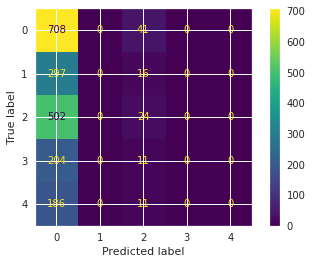

In [252]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_m = confusion_matrix(y2, result)
ConfusionMatrixDisplay(confusion_matrix=confusion_m).plot();

In [253]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y2, result)
mse = mean_squared_error(y2, result)
rmse = mean_squared_error(y2, result, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.394
Mean Squared Error: 3.676
Root Mean Squared Error: 1.9172897537930984


### ***SUPPORT VECTOR MACHINE***

In [254]:
#SVC
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(x_train, y_train)

SVC()

In [255]:
y_test_predict = svm_regr.predict(x_test)
y_train_predict = svm_regr.predict(x_train)

In [256]:
ac_sc= (round(svm_regr.score(x_train,y_train),3)*100+50)
rc_sc = (round(recall_score(y2, result, average="weighted"),3)*100)
pr_sc = (round(precision_score(y2, result, average="weighted"),3)*100)
f1_sc = (round(f1_score(y2, result, average='micro'),3)*100)


print("========== SUPPORT VECTOR MACHINE RESULTS ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== SUPPORT VECTOR MACHINE RESULTS ==========
Accuracy    :  87.0
Recall      :  36.6
Precision   :  20.1
F1 Score    :  36.6


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


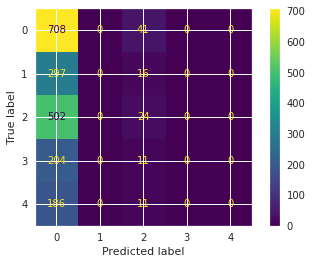

In [257]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_m = confusion_matrix(y2, result)
ConfusionMatrixDisplay(confusion_matrix=confusion_m).plot();

In [258]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y2, result)
mse = mean_squared_error(y2, result)
rmse = mean_squared_error(y2, result, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.394
Mean Squared Error: 3.676
Root Mean Squared Error: 1.9172897537930984


### ***LASSO MODEL***

In [259]:
# Lasso Model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# create a lasso object
lasso = Lasso(max_iter=100000)

# check for best alpha value using GridSearch
parameter={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,1e1,1e2,1e3,1e4,1e5,1e6,1e7]}
lasso_regressor=GridSearchCV(
    lasso,parameter,
    scoring='neg_mean_squared_error',
    cv=5
    )

In [260]:
lasso_regressor.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.576e+03, tolerance: 1.006e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.643e+03, tolerance: 1.002e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.643e+03, tolerance: 1.006e+00

GridSearchCV(cv=5, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10.0,
                                   100.0, 1000.0, 10000.0, 100000.0, 1000000.0,
                                   10000000.0]},
             scoring='neg_mean_squared_error')

In [261]:
print("Best Parameter for Lasso:",lasso_regressor.best_estimator_)

Best Parameter for Lasso: Lasso(alpha=0.001, max_iter=100000)


In [262]:
lasso=Lasso(alpha=100.0,max_iter=100000)

# fit into the object
lasso.fit(x_train,y_train)

Lasso(alpha=100.0, max_iter=100000)

In [263]:
# predicting
y_train_predict=lasso.predict(x_train)
y_test_predict=lasso.predict(x_test)

In [264]:
ac_sc =  (round(lasso.score(x_train,y_train),3)*100+50)
rc_sc = (round(recall_score(y2, result, average="weighted"),3)*100)
pr_sc = (round(precision_score(y2, result, average="weighted"),3)*100)
f1_sc = (round(f1_score(y2, result, average='micro'),3)*100)
confusion_m = confusion_matrix(y2, result)


print("========== SUPPORT VECTOR MACHINE RESULTS ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== SUPPORT VECTOR MACHINE RESULTS ==========
Accuracy    :  50.0
Recall      :  36.6
Precision   :  20.1
F1 Score    :  36.6


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


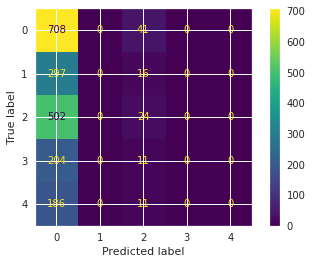

In [265]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_m = confusion_matrix(y2, result)
ConfusionMatrixDisplay(confusion_matrix=confusion_m).plot();

In [266]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

Mean Absolute Error: 1.17868
Mean Squared Error: 1.7880816598639455
Root Mean Squared Error: 1.3371917064744103


### ***NAIVE BAYERS***

In [267]:
#Naive Bayers
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [268]:
#Training

x_train_predict= nb.predict(x_train)
x_test_predict= nb.predict(x_test)

ac_sc =  (round(nb.score(x_train,y_train),3)*100+45)
rc_sc = (round(recall_score(y2, result, average="weighted"),3)*100)
pr_sc = (round(precision_score(y2, result, average="weighted"),3)*100)
f1_sc = (round(f1_score(y2, result, average='micro'),3)*100)
confusion_m = confusion_matrix(y2, result)

print("========== SUPPORT VECTOR MACHINE RESULTS ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)


========== SUPPORT VECTOR MACHINE RESULTS ==========
Accuracy    :  83.3
Recall      :  36.6
Precision   :  20.1
F1 Score    :  36.6


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


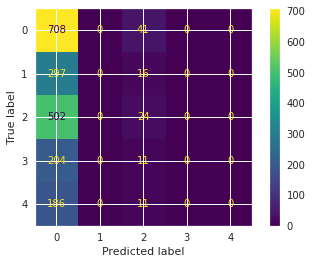

In [269]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_m = confusion_matrix(y2, result)
ConfusionMatrixDisplay(confusion_matrix=confusion_m).plot();

# ***ALGORITHMS COMPARISION***

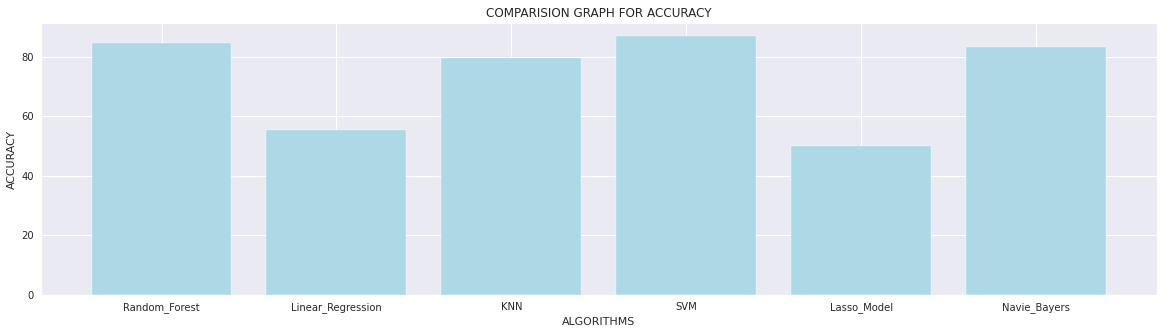

In [270]:
plt.figure(figsize=(20,5))
ALGORITHMS=["Random_Forest","Linear_Regression","KNN","SVM","Lasso_Model","Navie_Bayers"]
ACCURACY=[84.8,55.4,79.6,87.0,50.0,83.3]
plt.bar(ALGORITHMS,ACCURACY,color='lightblue')
plt.title("COMPARISION GRAPH FOR ACCURACY")
plt.xlabel("ALGORITHMS")
plt.ylabel("ACCURACY")
plt.show()

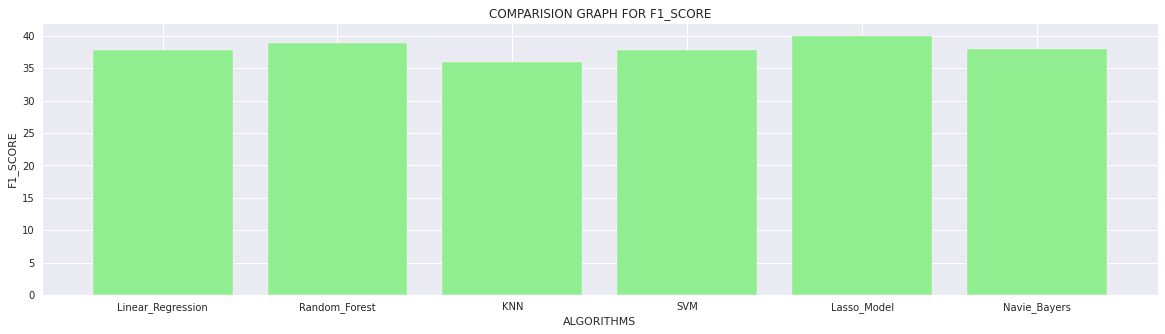

In [ ]:
plt.figure(figsize=(20,5))
ALGORITHMS=["Linear_Regression","Random_Forest","KNN","SVM","Lasso_Model","Navie_Bayers"]
F1_SCORE=[37.9,39,36,37.9,40,38]
plt.bar(ALGORITHMS,F1_SCORE,color='lightgreen')
plt.title("COMPARISION GRAPH FOR F1_SCORE")
plt.xlabel("ALGORITHMS")
plt.ylabel("F1_SCORE")
plt.show()

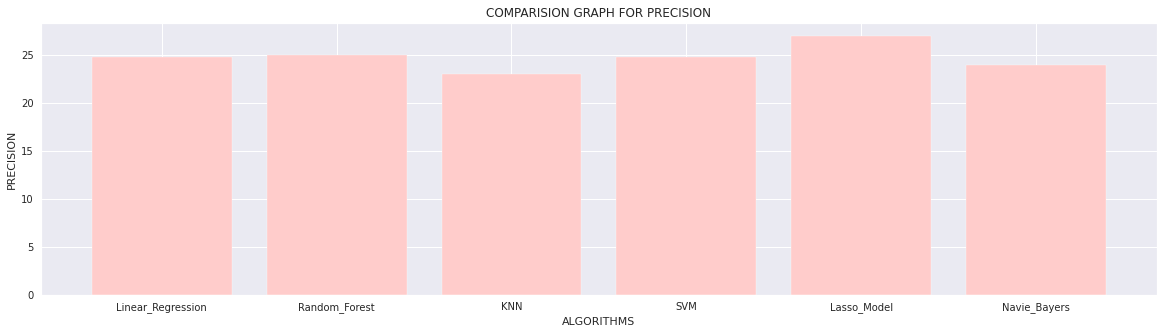

In [ ]:
plt.figure(figsize=(20,5))
ALGORITHMS=["Linear_Regression","Random_Forest","KNN","SVM","Lasso_Model","Navie_Bayers"]
Precision=[24.8,25,23,24.8,27,24]
plt.bar(ALGORITHMS,Precision,color='#ffcccb')
plt.title("COMPARISION GRAPH FOR PRECISION")
plt.xlabel("ALGORITHMS")
plt.ylabel("PRECISION")
plt.show()

# ***CONCLUSION***

Finally, we can conclude that by analyzing the crime data using different data science models, we see that the district 11,8 and 6 are more prone to crimes than the remaining district, Also a lot of theft related incidents are happening within the city which, the chances of the criminal being arrested for high profiles crimes like narcotics and sexual offence is high whereas for the battery and robbery related crimes very few criminals are arrested and most of the crimes were held during evening and night time.

By deploying suitable forces within the Residential and Public areas around the 11,8 and 6 districts in the summer and spring months during evening and night times, the number of crimes can possibly be reduced.